In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import webbrowser

## Q1-2: Motor Transport Accidents for Particular Years

In [18]:
# Load the CSV file
csv_file_path = '/home/ykapil897/dv/lab_2/Motor_Transport_Statistics_1997-98_Table_3.1.csv'
df = pd.read_csv(csv_file_path)

# Load the GeoJSON file
geojson_file_path = '/home/ykapil897/dv/lab_2/India-States.shp'
gdf = gpd.read_file(geojson_file_path)



In [23]:
for entry in gdf['ST_NM'].tolist():
    print(entry, end=" \n")

print(gdf.columns)

Andaman & Nicobar Island 
Andhra Pradesh 
Arunanchal Pradesh 
Assam 
Bihar 
Chandigarh 
Chhattisgarh 
Dadara & Nagar Havelli 
Daman & Diu 
Goa 
Gujarat 
Haryana 
Himachal Pradesh 
Jammu & Kashmir 
Jharkhand 
Karnataka 
Kerala 
Lakshadweep 
Madhya Pradesh 
Maharashtra 
Manipur 
Meghalaya 
Mizoram 
Nagaland 
NCT of Delhi 
Puducherry 
Punjab 
Rajasthan 
Sikkim 
Tamil Nadu 
Telangana 
Tripura 
Uttar Pradesh 
Uttarakhand 
West Bengal 
Odisha 
Index(['ST_NM', 'geometry'], dtype='object')


In [27]:
# List of states and UTs to include
states_uts_list = [
    'Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunanchal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 
    'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 
    'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 
    'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'NCT of Delhi', 'Puducherry', 'Punjab', 'Rajasthan', 
    'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Odisha'
]

# Clean the data
df = df[df['STATE/Uts'].str.contains('STATE') | df['STATE/Uts'].str.contains('Uts')]

# Rename columns for merging
df.rename(columns={'Note of States /Uts': 'state_name'}, inplace=True)

# Remove unnecessary rows like totals
df = df[~df['state_name'].str.contains('Total')]

# Standardize state names to match the given list
df['state_name'] = df['state_name'].str.strip()
df['state_name'] = df['state_name'].replace({
    'Andaman & Nicobar Islands': 'Andaman & Nicobar Island',
    'Arunachal Pradesh': 'Arunanchal Pradesh',
    'Dadar & Nagar Haveli': 'Dadara & Nagar Havelli',
    'Delhi': 'NCT of Delhi',
    'Pondicherry': 'Puducherry',
    'Orissa': 'Odisha'
})
# print(df)
# Include only the states and UTs that are in the given list
df = df[df['state_name'].isin(states_uts_list)]

# Print the cleaned DataFrame
print(df)

   STATE/Uts                state_name   1996   1997   1998
0      STATE            Andhra Pradesh  18836  19745  21424
1      STATE        Arunanchal Pradesh    230    158    205
2      STATE                     Assam   1146   1187   1246
3      STATE                     Bihar   5255   5344   7167
4      STATE                       Goa   1021   1575   1313
5      STATE                   Gujarat  21479  23746  25361
6      STATE                   Haryana   4067   4575   4413
7      STATE          Himachal Pradesh   1704   1640   1639
8      STATE           Jammu & Kashmir   3335   4019   4242
9      STATE                 Karnataka  20930  31302  30177
10     STATE                    Kerala  35731  34656  32836
11     STATE            Madhya Pradesh  23260  21192  22608
12     STATE               Maharashtra  34426  34035  33875
13     STATE                   Manipur    399    396    411
14     STATE                 Meghalaya    107    100     95
15     STATE                   Mizoram  

In [28]:
# Merge the GeoDataFrame with the accident data
merged_gdf = gdf.merge(df, left_on='ST_NM', right_on='state_name', how='left')

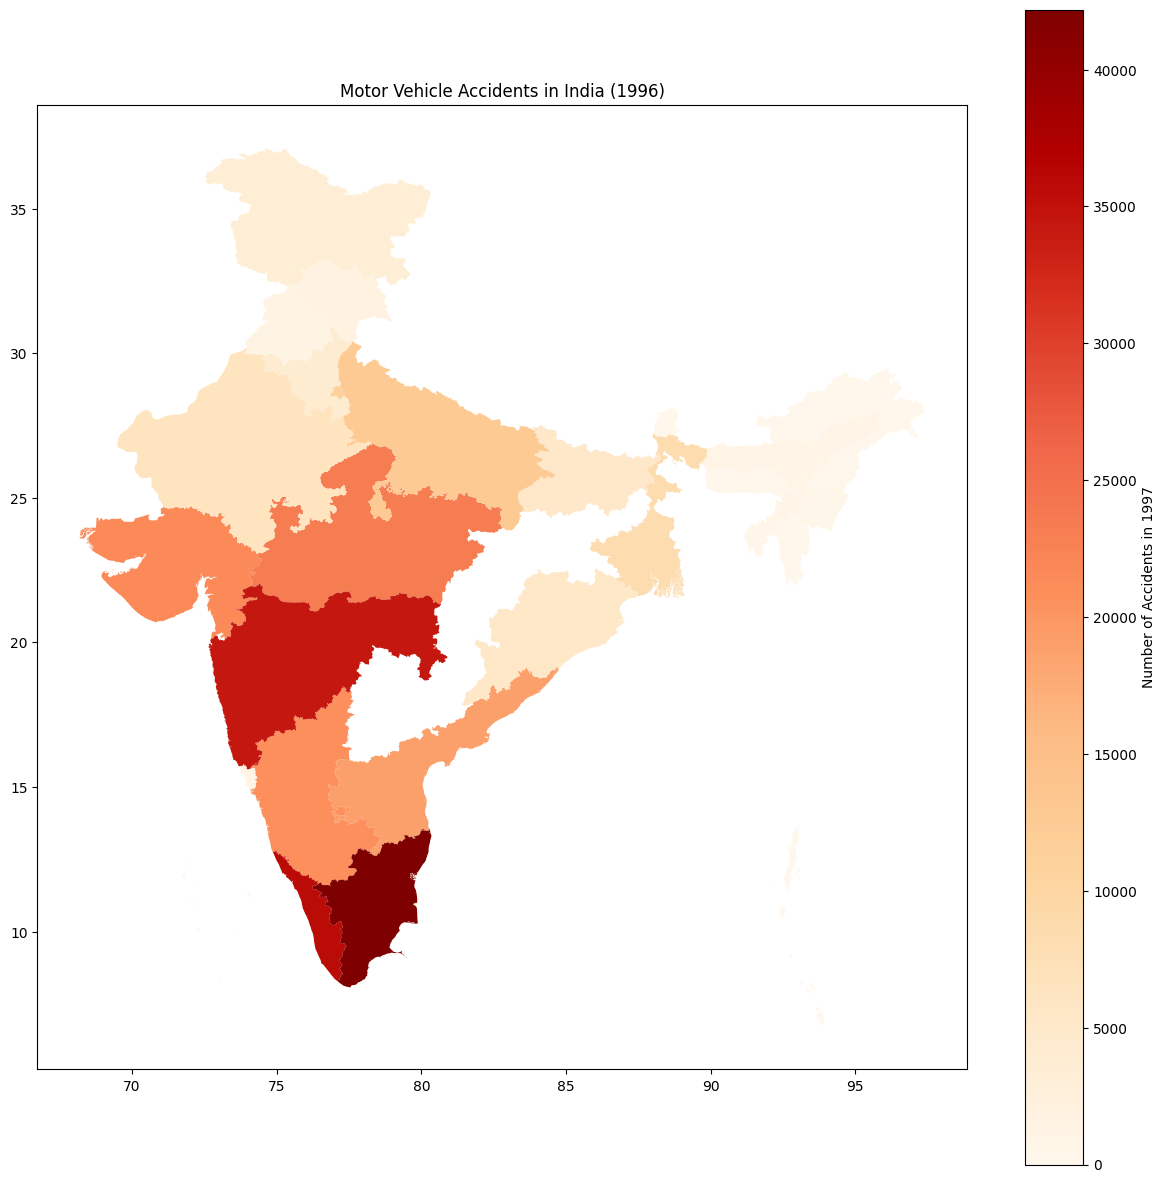

In [32]:
# Plot the choropleth map for a particular year (e.g., 1997)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_gdf.plot(column='1996', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Accidents in 1997"})
plt.title('Motor Vehicle Accidents in India (1996)')
plt.show()

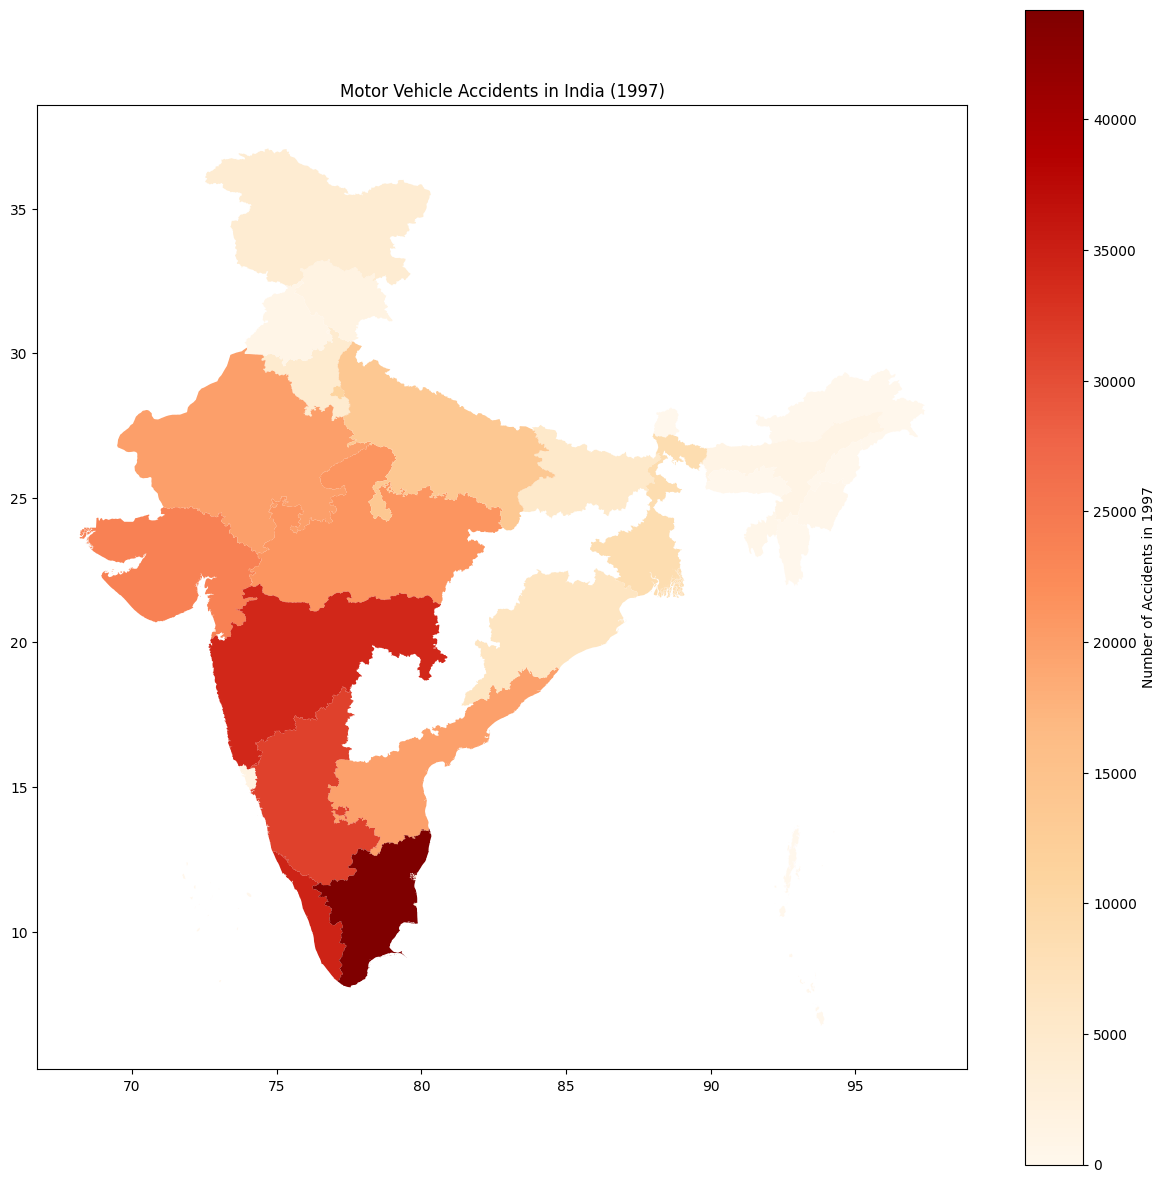

In [29]:
# Plot the choropleth map for a particular year (e.g., 1997)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_gdf.plot(column='1997', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Accidents in 1997"})
plt.title('Motor Vehicle Accidents in India (1997)')
plt.show()

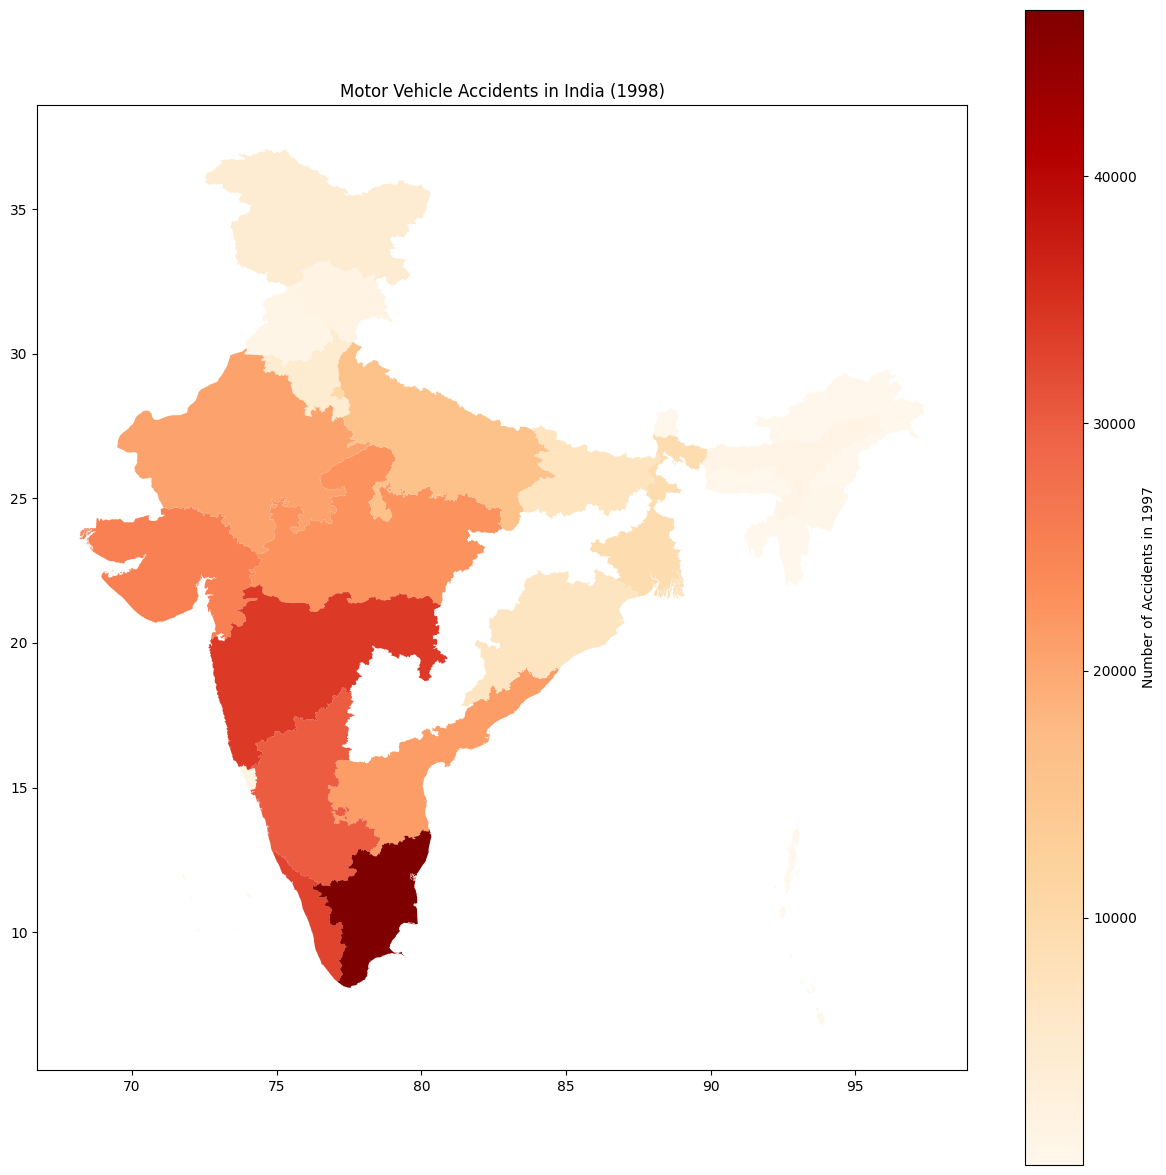

In [31]:
# Plot the choropleth map for a particular year (e.g., 1997)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_gdf.plot(column='1998', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Accidents in 1997"})
plt.title('Motor Vehicle Accidents in India (1998)')
plt.show()

In [33]:
# Load the CSV file
csv_file_path = '/home/ykapil897/dv/lab_2/Table_No_3.1_MTSI_1983-86.csv'
df = pd.read_csv(csv_file_path)

# List of states and UTs to include
states_uts_list = [
    'Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunanchal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 
    'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 
    'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 
    'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'NCT of Delhi', 'Puducherry', 'Punjab', 'Rajasthan', 
    'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Odisha'
]

# Clean the data
df = df[df['Category'].str.contains('State') | df['Category'].str.contains('Union Territories')]

# Rename columns for merging
df.rename(columns={'States/ Uts': 'state_name'}, inplace=True)

# Remove unnecessary rows like totals
df = df[~df['state_name'].str.contains('All India Total')]

# Standardize state names to match the given list
df['state_name'] = df['state_name'].str.strip()
df['state_name'] = df['state_name'].replace({
    'A & N Islands': 'Andaman & Nicobar Island',
    'Arunachal Pradesh': 'Arunanchal Pradesh',
    'Dadara & Nagar Haveli': 'Dadara & Nagar Havelli',
    'Delhi': 'NCT of Delhi',
    'Pondicherry': 'Puducherry',
    'Orissa': 'Odisha',
    'Goa, Daman & Diu': 'Goa'
})

# Include only the states and UTs that are in the given list
df = df[df['state_name'].isin(states_uts_list)]

# Print the cleaned DataFrame
print(df)

             Category                state_name  Year - 1983  Year - 1984  \
0               State            Andhra Pradesh         9746        11507   
1               State                     Assam          390          926   
2               State                     Bihar         7087         6382   
3               State                   Gujarat        13814        16248   
4               State                   Haryana         2016         2203   
5               State          Himachal Pradesh          551          593   
6               State           Jammu & Kashmir         2051         2027   
7               State                 Karnataka        13357        14905   
8               State                    Kerala         9347         9324   
10              State               Maharashtra        44975        48439   
11              State                   Manipur          201          203   
12              State                 Meghalaya          291          418   

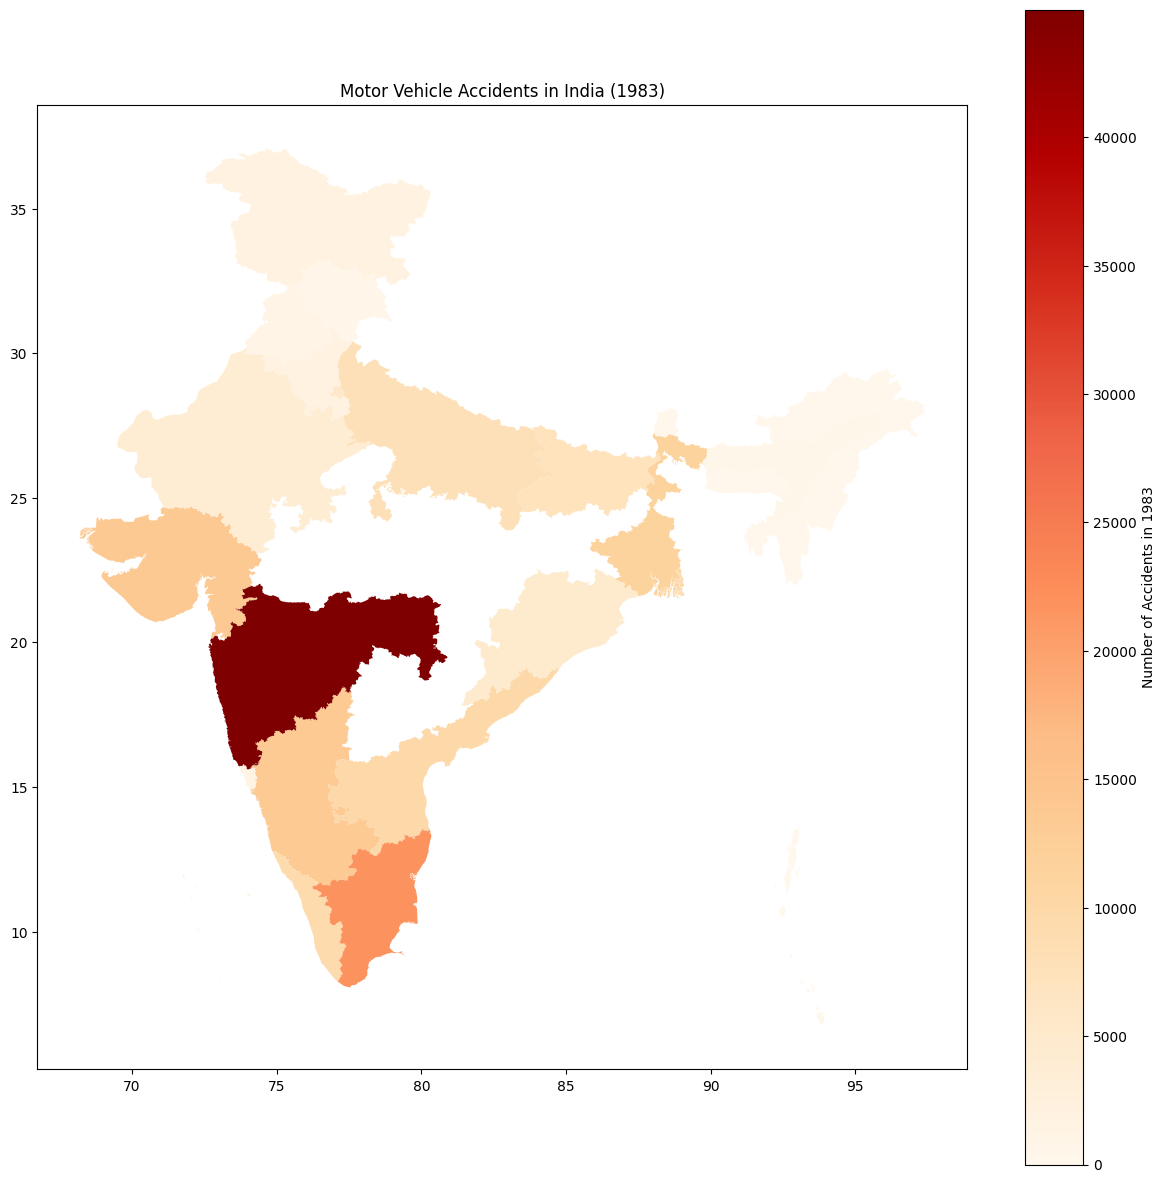

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Merge the GeoDataFrame with the accident data
merged_gdf = gdf.merge(df, left_on='ST_NM', right_on='state_name', how='left')

# Plot the choropleth map for a particular year (e.g., 1983)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_gdf.plot(column='Year - 1983', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Accidents in 1983"})
plt.title('Motor Vehicle Accidents in India (1983)')
plt.show()

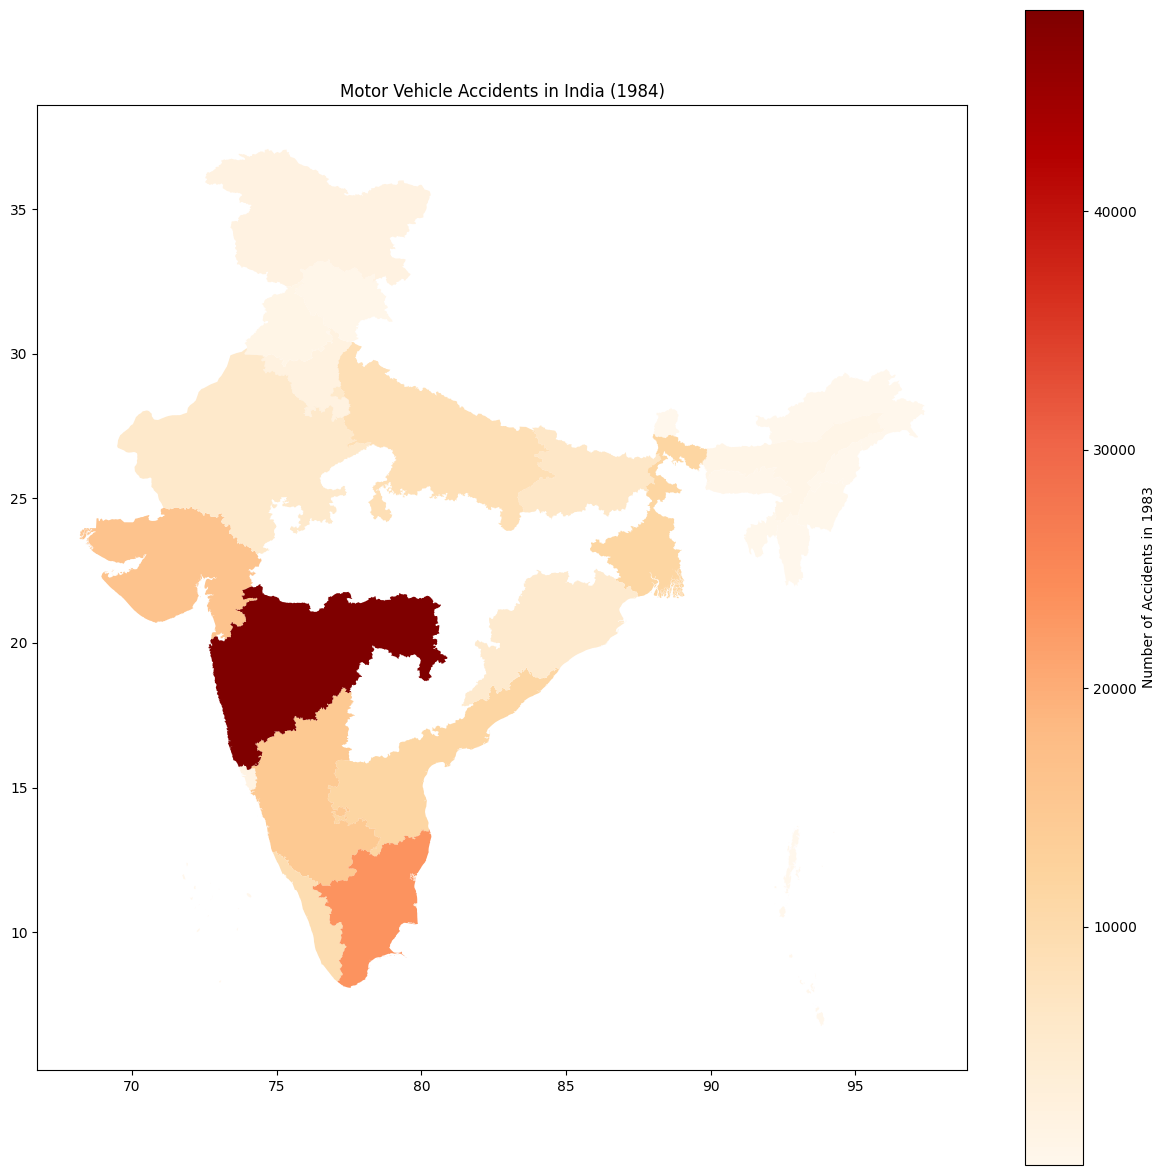

In [35]:
# Plot the choropleth map for a particular year (e.g., 1983)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_gdf.plot(column='Year - 1984', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Accidents in 1983"})
plt.title('Motor Vehicle Accidents in India (1984)')
plt.show()

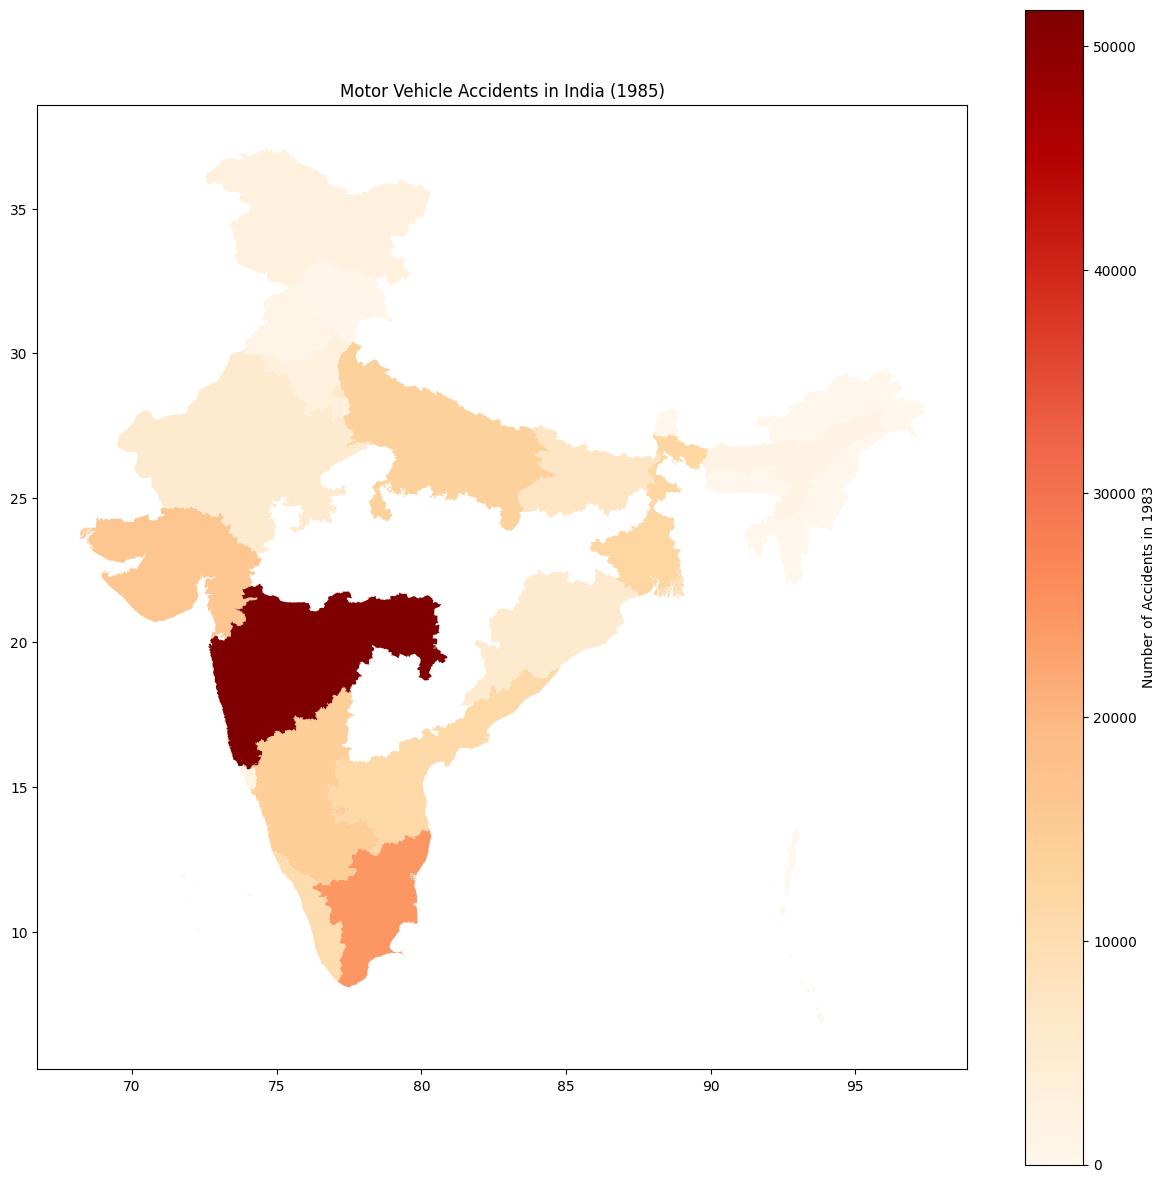

In [36]:
# Plot the choropleth map for a particular year (e.g., 1983)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_gdf.plot(column='Year - 1985', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Accidents in 1983"})
plt.title('Motor Vehicle Accidents in India (1985)')
plt.show()

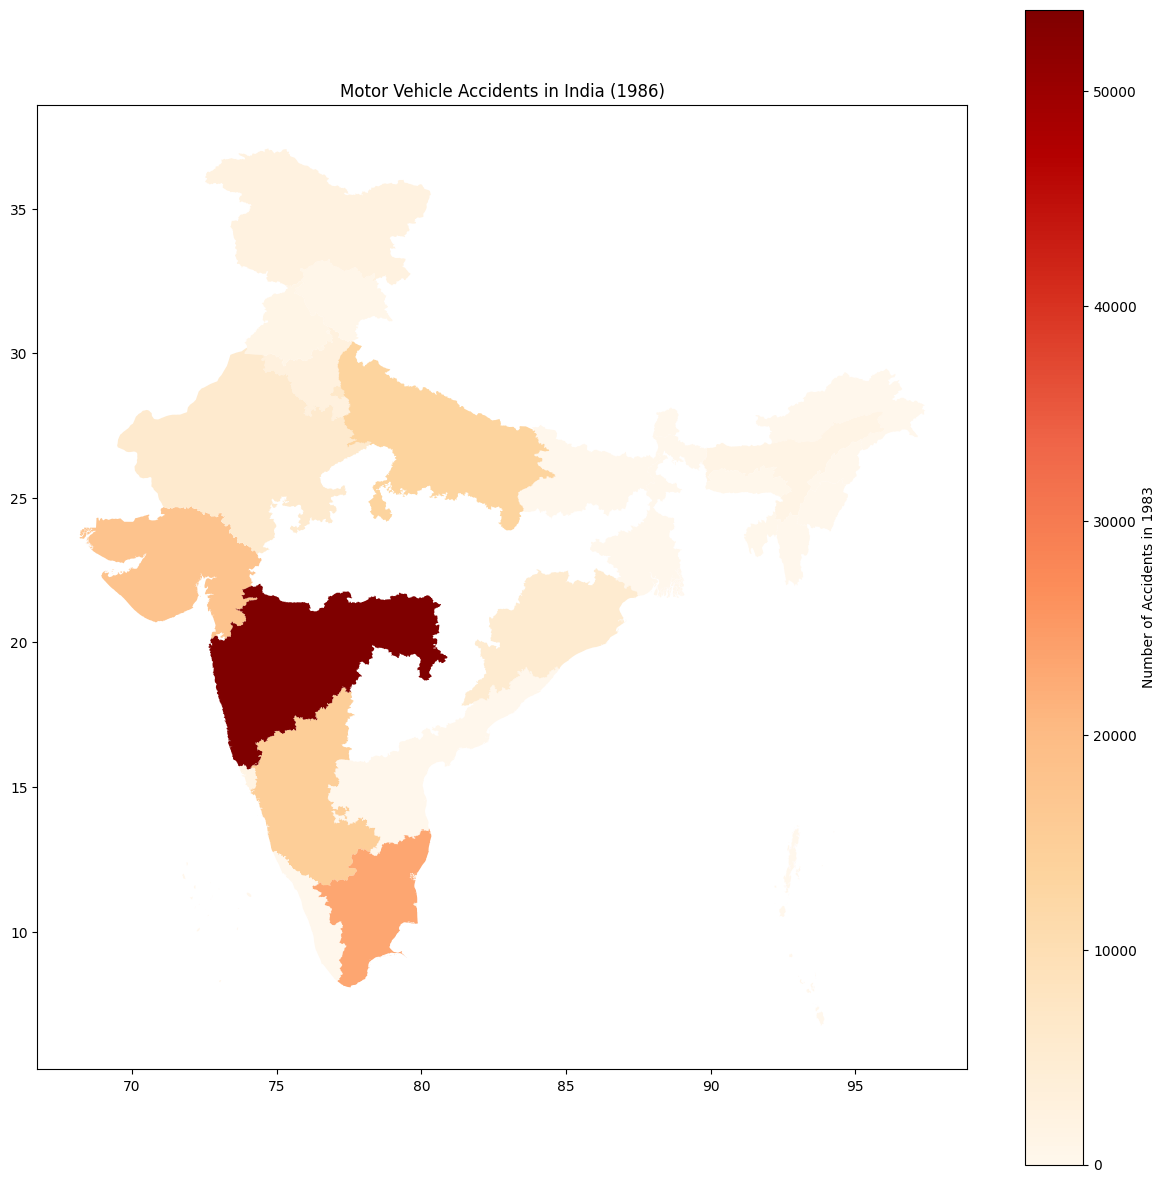

In [37]:
# Plot the choropleth map for a particular year (e.g., 1983)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_gdf.plot(column='Year - 1986', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Accidents in 1983"})
plt.title('Motor Vehicle Accidents in India (1986)')
plt.show()

In [4]:
# Load the bird migration data
bird_data = pd.read_csv("/home/ykapil897/dv/lab_2/bird_migration.csv")  # Adjust the path as needed

# Create a base world map centered at the average location
m = folium.Map(location=[bird_data["latitude"].mean(), bird_data["longitude"].mean()], zoom_start=3)

# Create a marker cluster for better visualization
marker_cluster = MarkerCluster().add_to(m)

# Assign unique colors for birds
colors = ["red", "blue", "green", "purple", "orange"]
bird_colors = {bird: colors[i % len(colors)] for i, bird in enumerate(bird_data["bird_name"].unique())}

# Plot each bird's migration route separately
for bird in bird_data["bird_name"].unique():
    bird_df = bird_data[bird_data["bird_name"] == bird]
    
    # Add migration route as a line
    folium.PolyLine(
        locations=list(zip(bird_df["latitude"], bird_df["longitude"])),
        color=bird_colors[bird],
        weight=2.5,
        opacity=0.7,
        popup=bird
    ).add_to(m)
    
    # Add markers at each migration stop
    for _, row in bird_df.iterrows():
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=3,
            color=bird_colors[bird],
            fill=True,
            fill_color=bird_colors[bird],
            fill_opacity=0.6,
            popup=f"Bird: {bird}, Time: {row['date_time']}"
        ).add_to(marker_cluster)

# Add a legend with bird names and colors
legend_html = """
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 180px; height: auto; 
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px;">
<b>Bird Names</b><br>
""" + "".join([f'<span style="color:{color};">&#9679;</span> {bird}<br>' for bird, color in bird_colors.items()]) + """
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Add a title to the map
title_html = """
<div style="position: fixed; 
            top: 10px; left: 50%; transform: translateX(-50%);
            background-color: white; padding: 10px; 
            font-size: 20px; font-weight: bold; 
            z-index: 1000; border: 2px solid black;">
    Bird Migration Map
</div>
"""
m.get_root().html.add_child(folium.Element(title_html))


# Save the interactive map
m.save("bird_migration_map.html")
print("Map saved as bird_migration_map.html. Open it in a browser to view.")


Map saved as bird_migration_map.html. Open it in a browser to view.


In [ ]:
webbrowser.open("bird_migration_map.html")

True